In [29]:
import colorsys as cs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance

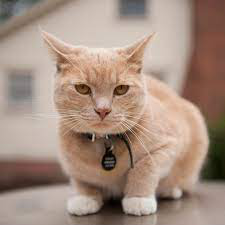

In [30]:
image = Image.open('cat_test.jpeg')
image

In [57]:
rgb_image = np.asarray(image)
hls_image = [[ list(cs.rgb_to_hls(*rgb/255)) for rgb in row] for row in rgb_image]

In [64]:
def hls_to_rgb(r, g, b):
  return[ color * 255 for color in list(cs.hls_to_rgb(r,g,b))]
 

def adjust_hls(image, hue=1, light=1, saturation=1):
  hls_image = [[list(cs.rgb_to_hls(*rgb/255)) for rgb in row] for row in image]
  hls_adjusted_image = [[[hls[0]*hue,hls[1]*light,hls[2]*saturation] for hls in row] for row in hls_image]
  back_to_rgb = [[ np.asarray(hls_to_rgb(*rgb)).astype(int) for rgb in row] for row in hls_adjusted_image]
  return back_to_rgb

def match_cdf(source):
  values,unique_indices,counts = np.unique(source.ravel(),return_inverse = True, return_counts = True)
  return values,unique_indices,counts
  

In [66]:
match_cdf(rgb_image)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


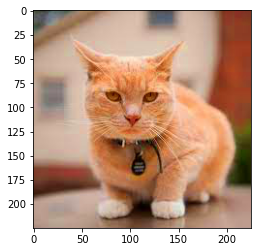

In [56]:
rgb_bright = adjust_hls(rgb_image,saturation = 2)
image2 = plt.imshow(rgb_bright)
image2

In [ ]:
""" The scikit histogram_matching function reads in a numpy array of RGB values and creates an average of the values
Then uses the np.interp and .reshape to normalize the values. Instead of reading in RGB values, we could use the 
colorsys library to convert the RGB values to HSL values (hue, saturation, lightness). We can then pull each individual
value to create separate tools for Hue, Saturation, and Lightness."""